In [66]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [81]:
#load the dataset
data=pd.read_csv("../notebooks/data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
x=data.drop(labels=["expenses"],axis=1)

In [23]:
y=data[['expenses']]

In [24]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [14]:
categorical_cols=x.select_dtypes(include='object').columns

In [15]:
numerical_cols=x.select_dtypes(exclude='object').columns

In [16]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
numerical_cols

Index(['age', 'bmi', 'children'], dtype='object')

In [59]:
data[categorical_cols]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [60]:
data[numerical_cols]

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0
...,...,...,...
1333,50,31.0,3
1334,18,31.9,0
1335,18,36.9,0
1336,21,25.8,0


In [61]:
data[categorical_cols].describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [62]:
data[categorical_cols]['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [63]:
data[categorical_cols]['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [64]:
data[categorical_cols]['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [67]:
data[numerical_cols].corr()

,age,bmi,children
age,1.000000,0.109341,0.042469
bmi,0.109341,1.000000,0.012645
children,0.042469,0.012645,1.000000


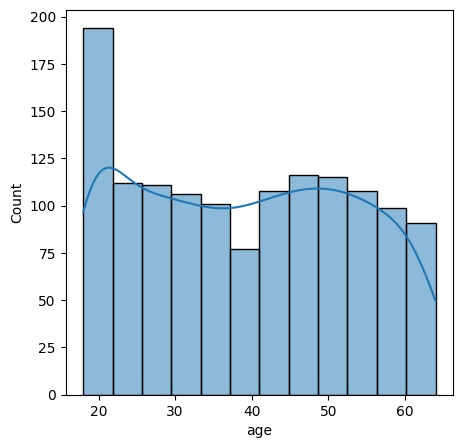

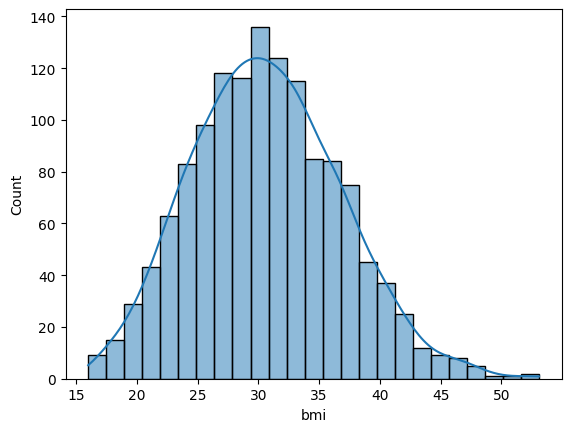

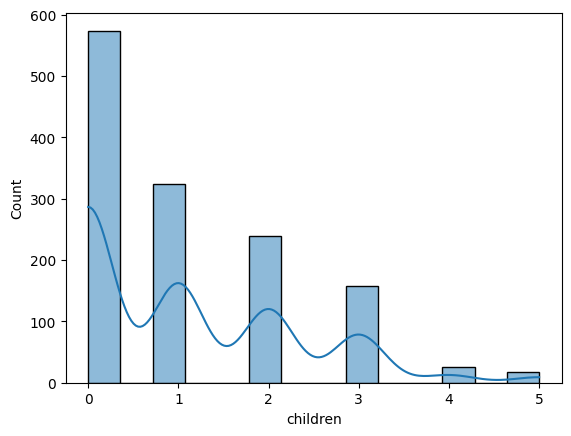

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for cols in numerical_cols:    
    sns.histplot(data=data,x=cols,kde=True)
    print("\n")
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25476\2942893054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=cols,palette="colorblind")


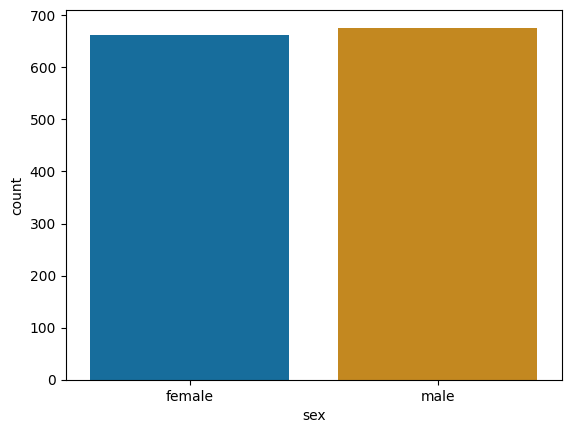

C:\Users\DELL\AppData\Local\Temp\ipykernel_25476\2942893054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=cols,palette="colorblind")


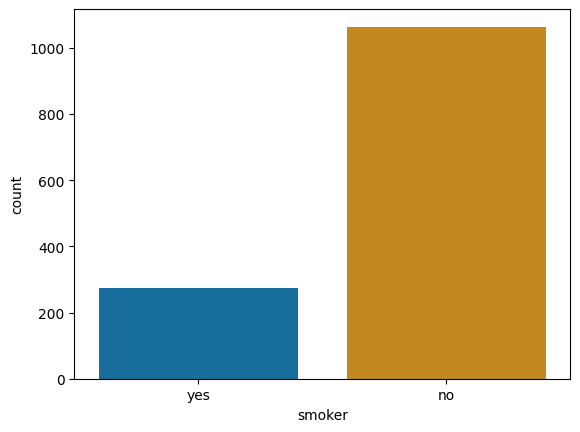

C:\Users\DELL\AppData\Local\Temp\ipykernel_25476\2942893054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=cols,palette="colorblind")


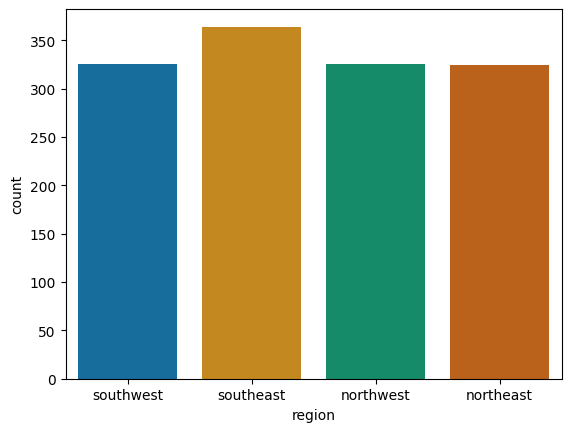

In [86]:
for cols in categorical_cols:
    sns.countplot(data=data,x=cols,palette="colorblind")
    print("\n")
    plt.show()

<Axes: >

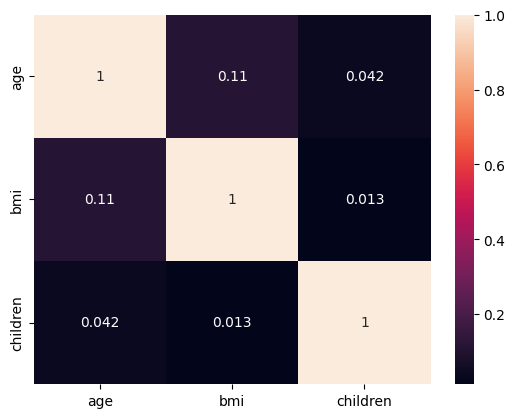

In [87]:
sns.heatmap(data[numerical_cols].corr(),annot=True)

In [32]:
data[categorical_cols]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [35]:
print(data['smoker'].unique())
print(data['sex'].unique())
print(data['region'].unique())


['yes' 'no']
['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']


In [36]:
smoker_map={'yes':1,'no':0}
sex_map={'female':1,"male":0}
region_map={'southwest':1, 'southeast':2, 'northwest':3, 'northeast': 4}

In [39]:
data['smoker'] = data['smoker'].map(smoker_map)
data['sex'] = data['sex'].map(sex_map)
data['region'] = data['region'].map(region_map)

In [79]:
data.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,1,1
1,18,0,33.8,1,0,2
2,28,0,33.0,3,0,2
3,33,0,22.7,0,0,3
4,32,0,28.9,0,0,3


In [82]:
x=data.drop(['expenses'],axis=1)

In [83]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [45]:
y=data['expenses']

In [46]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [85]:
x_train

,age,sex,bmi,children,smoker,region
864,51,0,25.4,0,0,1
327,45,0,36.5,2,1,3
1271,25,1,34.5,0,0,3
588,61,1,35.9,0,0,4
1172,56,1,41.9,0,0,2
...,...,...,...,...,...,...
1009,51,0,27.7,1,0,4
418,64,0,39.2,1,0,2
349,19,0,27.8,0,0,3
356,46,0,43.9,3,0,2


In [69]:
y_train

,age,sex,bmi,children,smoker,region
626,36,0,28.9,3,0,4
225,55,0,33.9,3,0,2
1196,19,1,30.0,0,1,3
214,45,1,30.9,2,0,1
321,26,1,29.6,4,0,4
...,...,...,...,...,...,...
882,21,1,22.1,0,0,4
52,48,0,28.0,1,1,1
153,42,1,23.4,0,1,4
834,36,0,33.8,1,0,3


In [70]:
y_test

626      6748.59
225     11987.17
1196    33307.55
214      8520.03
321     24671.66
          ...   
882      2585.85
52      23568.27
153     19964.75
834      5377.46
1244     1135.94
Name: expenses, Length: 268, dtype: float64

In [86]:
linear_reg.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1070, 268]

In [57]:
y_pred=linear_reg.predict(x_test)

e:\Data_Science\Internship\Project2\Insurance_Premium_Prediction\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [58]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [59]:
from sklearn.preprocessing import OneHotEncoder
cat_cols_tranform=OneHotEncoder(handle_unknown='ignore')

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_cols_transform=Pipeline(steps=[('Scaler',StandardScaler())])

In [61]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[
        ('Numeric_val',num_cols_transform,numerical_cols),
        ('Categorical_val',cat_cols_tranform,categorical_cols)
    ]
)


In [62]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.20,)

In [64]:
print(x_train.shape,y_test.shape)

(1070, 6) (268,)


In [67]:
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(x_train, y_train)

y_pred = linear_reg.predict(x_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

ValueError: Found input variables with inconsistent numbers of samples: [1070, 268]